# Titanic data analysis

This notebook consists the data analysis of titanic dataset. It has all the information of how many people were on board, their tickets fares, ticket class, age etc. The analysis is broken into three main sections as mentioned below:

**Exploratory Data Analysis:** First section of this notebook explores the data and cleans and fix some of the columns which can generate statistically wrong results.

**Feature Engineering:** Second section dives deeper into exploring each individual feature and engineer some new features which will help in further analysis.

**Machine Learning:** Last section consists of trying out some famous machine learning models to the data and generates its results in terms of confusion matrix to better understand as to which model performs the best.

# Exploratory Data Analysis

### Importing libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing the data

In [4]:
titanic_df = pd.read_csv('C:/Users/dania/Documents/Python/titanic_eda/titanic.csv')

In [5]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3 pclass,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1 pclass,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3 pclass,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1 pcl,Mrs. Jacques Heath (Lily May Peel) Futrelle,NaN,35.0,1,0,53.1000
4,0,3 pclass,Mr. William Henry Allen,male,35.0,0,0,8.0500


Using Sweetviz (automatic EDA library) to have a general overview of the data. The advantage of using automatic EDA packages is that they use only few number of funcitons to clean and visaulize the datasets hence reducing number of code lines and processing time as well.

In [6]:
import sweetviz as svz

In [7]:
titanic_report = svz.analyze(titanic_df)
titanic_report.show_html('Titanic data report')

                                             |                                             | [  0%]   00:00 ->…

Report Titanic data report was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


8 differnt features are present in the dataset

Check null values

In [8]:
titanic_df.isnull().sum()

Survived                    0
Pclass                      0
Name                        0
Sex                        13
Age                         0
Siblings/Spouses Aboard     0
Parents/Children Aboard     0
Fare                        0
dtype: int64

Only Sex feature has null values

Checking the data types of each feature 

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    object 
 2   Name                     887 non-null    object 
 3   Sex                      874 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


### Distribution of the numerical features

In [10]:
titanic_df.describe()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000
mean,0.385569,31.336156,0.466742,0.331454,10517.085578
std,0.487004,28.162654,1.130717,0.830127,81274.234057
min,0.000000,-56.000000,-8.000000,-5.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,38.000000,1.000000,0.000000,31.387500
max,1.000000,240.000000,8.000000,6.000000,800069.550000


There are some values in the Age, Siblings, and Parents columns which are negative. This results in wrong statistical results. This need to be fixed first.

### Fixing negative values

In [11]:
titanic_df['Age'] = titanic_df['Age'].abs()
titanic_df['Siblings/Spouses Aboard'] = titanic_df['Siblings/Spouses Aboard'].abs()
titanic_df['Parents/Children Aboard'] = titanic_df['Parents/Children Aboard'].abs()

In [12]:
titanic_df.describe()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000
mean,0.385569,32.177193,0.525366,0.383315,10517.085578
std,0.487004,27.196649,1.104669,0.807466,81274.234057
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.250000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,39.000000,1.000000,0.000000,31.387500
max,1.000000,240.000000,8.000000,6.000000,800069.550000


 - Survived is a categorical feature with 0 or 1 values
 - Approximately 38.5% of people survived
 - Total unique values are 887 number of passengers
 - Around 30% of the passengers had siblings and/or spouse aboard
 - Around only 33% of passengers travelled with their parents
 - Fares had huge variation, where minimum fare is as low as 0 (could be the fare o on board employees) and maximum is as high as 800070$ (seems unrealistic)

### Distribution of categorical features

In [13]:
titanic_df.describe(include=['O'])

,Pclass,Name,Sex
count,887,887,874
unique,23,887,2
top,3-pclass,Mr. Chang Chip,male
freq,262,1,565


 - Pclass consists of differnt types of classes of tickets. There are 23 different classes (this needs to be fixed because 23 classes are not practical)
 - Names are all unique
 - Sex variable as two possible values with majority of males (65%)

Fixing the 'Pclass' column names

In [14]:
titanic_df['Pclass'].value_counts()

3-pclass    262
3 pclass    169
1-pclass    108
2-pclass    100
1 pclass     72
2 pclass     57
3-pclas      21
3-pcla       18
1-pclas      14
3 pcla        9
2 pcla        8
2 pclas       7
1 pcla        7
2-pcla        7
1-pcla        7
3 pclas       5
1 pclas       4
2-pclas       4
3-pcl         2
1 pcl         2
1-pcl         2
3 pcl         1
2 pcl         1
Name: Pclass, dtype: int64

In [15]:
titanic_df['Pclass'] = titanic_df['Pclass'].replace(['3-pcla', '3-pclas', '3 pclas', '3 pclass', '3 pcla', '3-pcl', '3 pcl', '3-pclass'], '3')
titanic_df['Pclass'] = titanic_df['Pclass'].replace(['2-pcla', '2-pclas', '2 pclas', '2 pclass', '2 pcla', '2-pcl', '2 pcl', '2-pclass'], '2')
titanic_df['Pclass'] = titanic_df['Pclass'].replace(['1-pcla', '1-pclas', '1 pclas', '1 pclass', '1 pcla', '1-pcl', '1 pcl', '1-pclass'], '1')

Renaming classes into integers 1,2 and 3 to later use this feature in machine learning modelling as they cannot take string as an input.

In [16]:
titanic_df['Pclass'].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
titanic_df.describe(include=['O'])

,Pclass,Name,Sex
count,887,887,874
unique,3,887,2
top,3,Mr. Chang Chip,male
freq,487,1,565


## Insights of each feature

### Survival feature

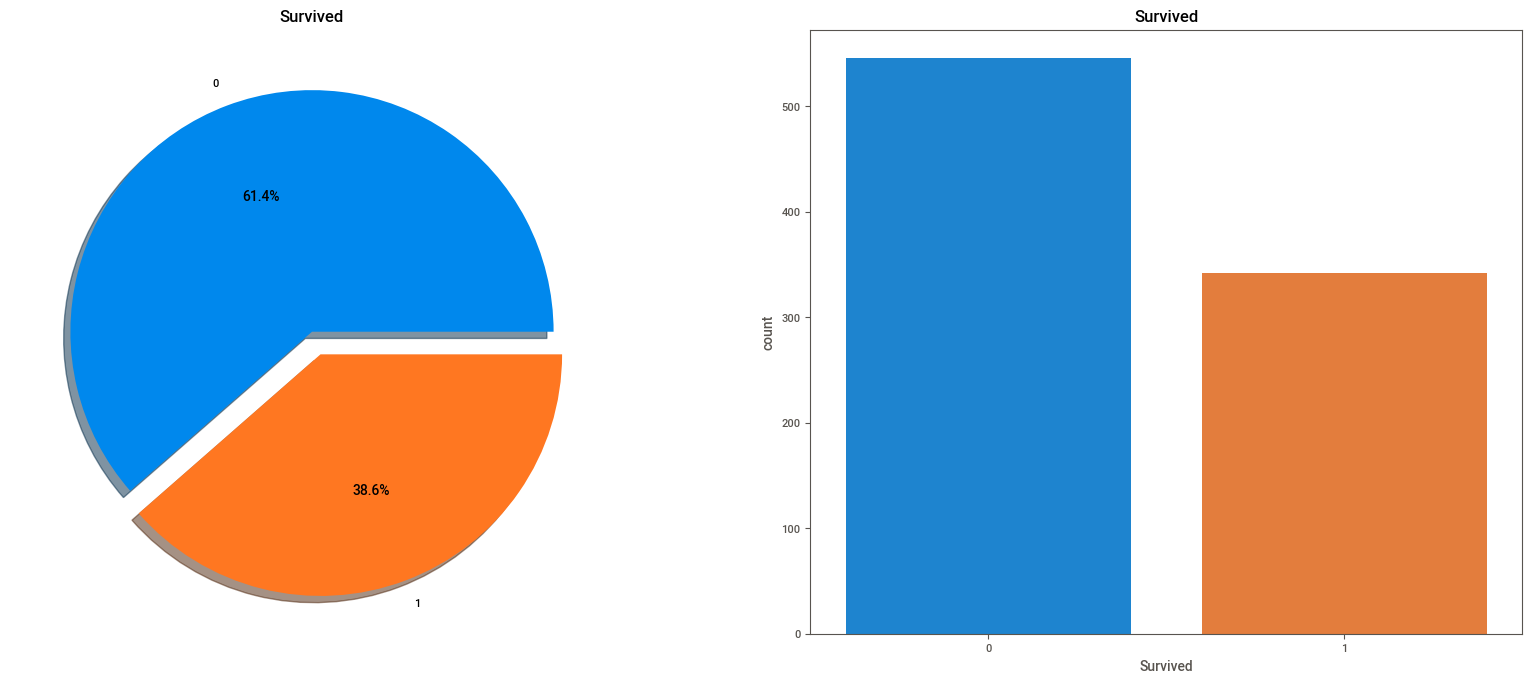

In [18]:
f, ax = plt.subplots(1,2,figsize=(18,8))
titanic_df['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data = titanic_df, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

It is clear that majority of passengers did not survive which is more than 500 out of 887 or 61.4%

We can calculate the survival rate of different passengers such as people in different classes or ages to get better insights.

### Age feature

In [19]:
print('Average Age on the ship:', titanic_df['Age'].mean(),'Years')
print('Youngest Passenger:', titanic_df['Age'].min(),'Years')
print('Oldest Passenger:', titanic_df['Age'].max(),'Years')

Average Age on the ship: 32.17719278466742 Years
Youngest Passenger: 0.42 Years
Oldest Passenger: 240.0 Years


There are ages above 200 which is practically not possble therefore these records needs to be fixed. Age of a passenger can be predicted according to different features such as gender, Pclass and other features but in this analysis the outlier ages are simply removed to keep analysis simple.

In [20]:
titanic_df = titanic_df[~(titanic_df['Age'] >= 150)]

In [21]:
print('Average Age on the ship:', titanic_df['Age'].mean(),'Years')
print('Youngest Passenger:', titanic_df['Age'].min(),'Years')
print('Oldest Passenger:', titanic_df['Age'].max(),'Years')

Average Age on the ship: 29.456765714285712 Years
Youngest Passenger: 0.42 Years
Oldest Passenger: 80.0 Years


Oldest age of 80 seems fair. The minimum age = 0.42 is not correct but it is being ignored for now to keep analysis simple. Although these ages can be re-engineered by randomly taking the value between the median and mean of age of specific gender to which this person belongs.

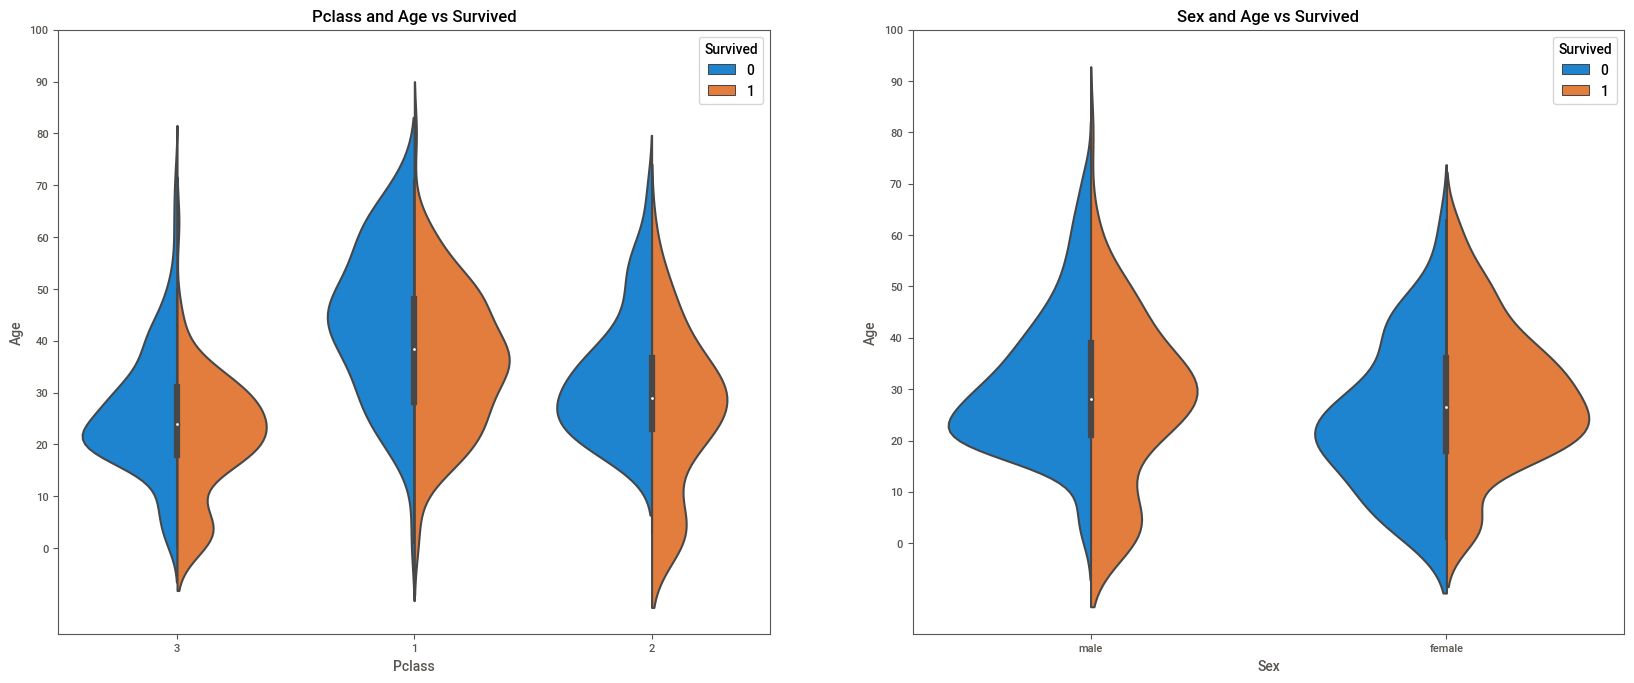

In [22]:
f, ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot("Pclass", "Age", hue = "Survived", data = titanic_df, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue = "Survived", data = titanic_df, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

 - In the left graph, it can be noticed that the number of children increases with Pclass. 1-Pclass has lowest number of childern. Secondly, the survival rate for passenegers below approximately age 10 looks irrelevant of the Pclass.

 - Survival chances for Passenegers aged 20-50 in 1-Pclass is high and shows greater region for women means more women survived compared to men.

 - From the right graph, it can be inferred that the survival chances decreases with an increase in age of men.

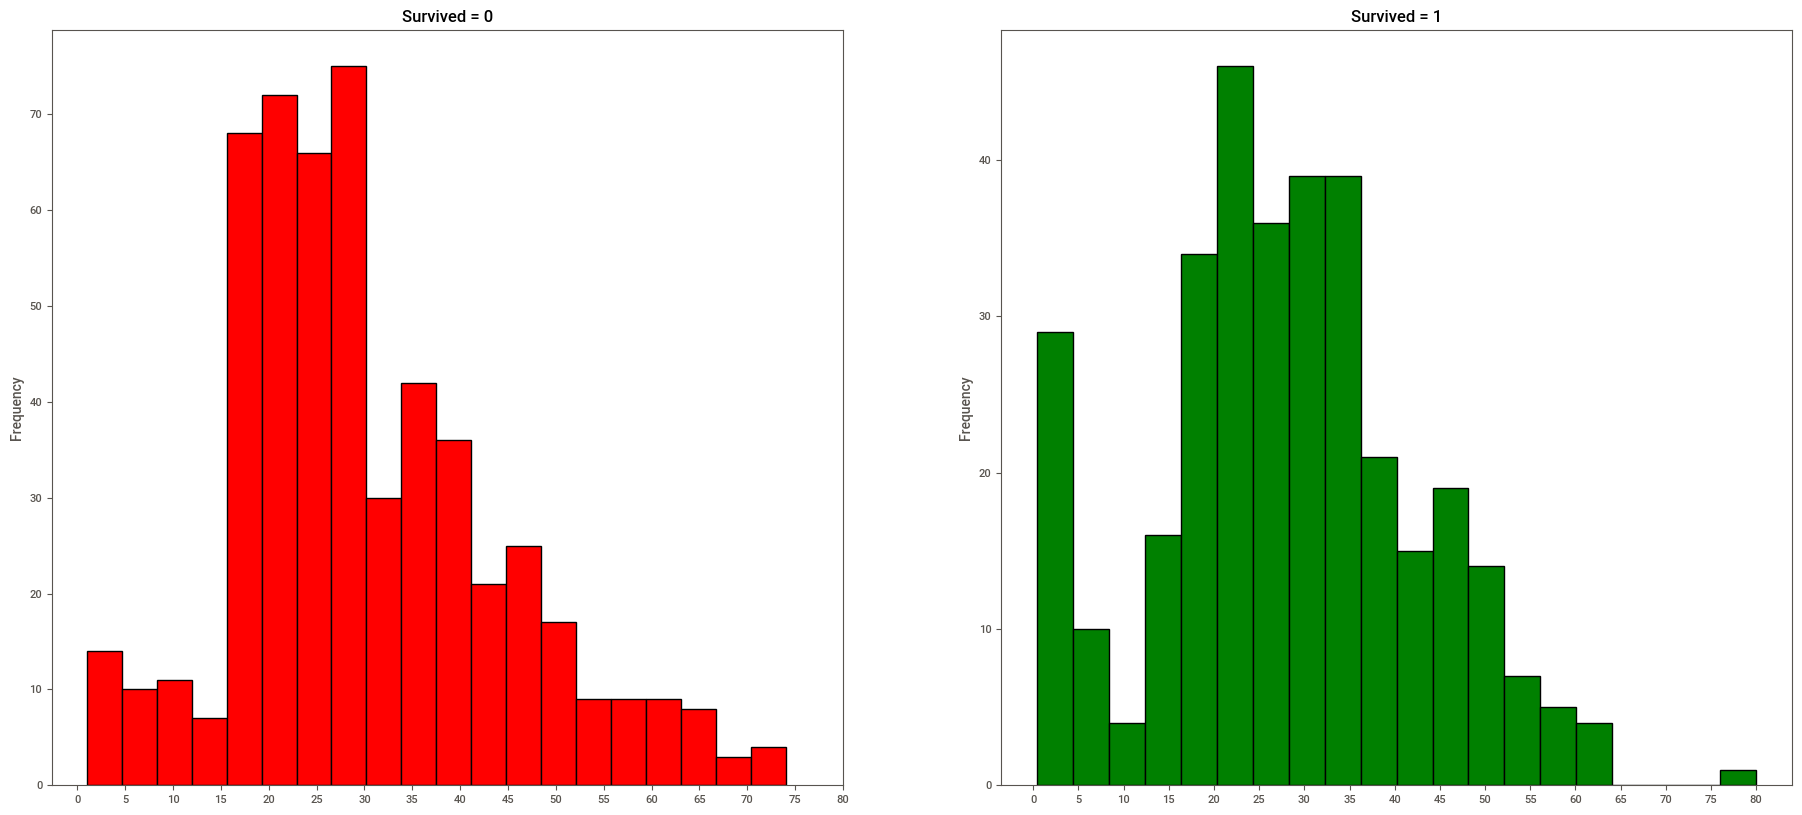

In [23]:
f, ax = plt.subplots(1, 2, figsize = (20,10))
titanic_df[titanic_df['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic_df[titanic_df['Survived'] == 1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

 - Highest number of deaths were in age group of 16-40
 - Passengers saved varied from toddles to age 65 but one 80 years old person was also saved
 - The toddles of age 5 or less were saved in huge number

### Sex feature

In [24]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            78
        1           228
male    0           451
        1           105
Name: Survived, dtype: int64

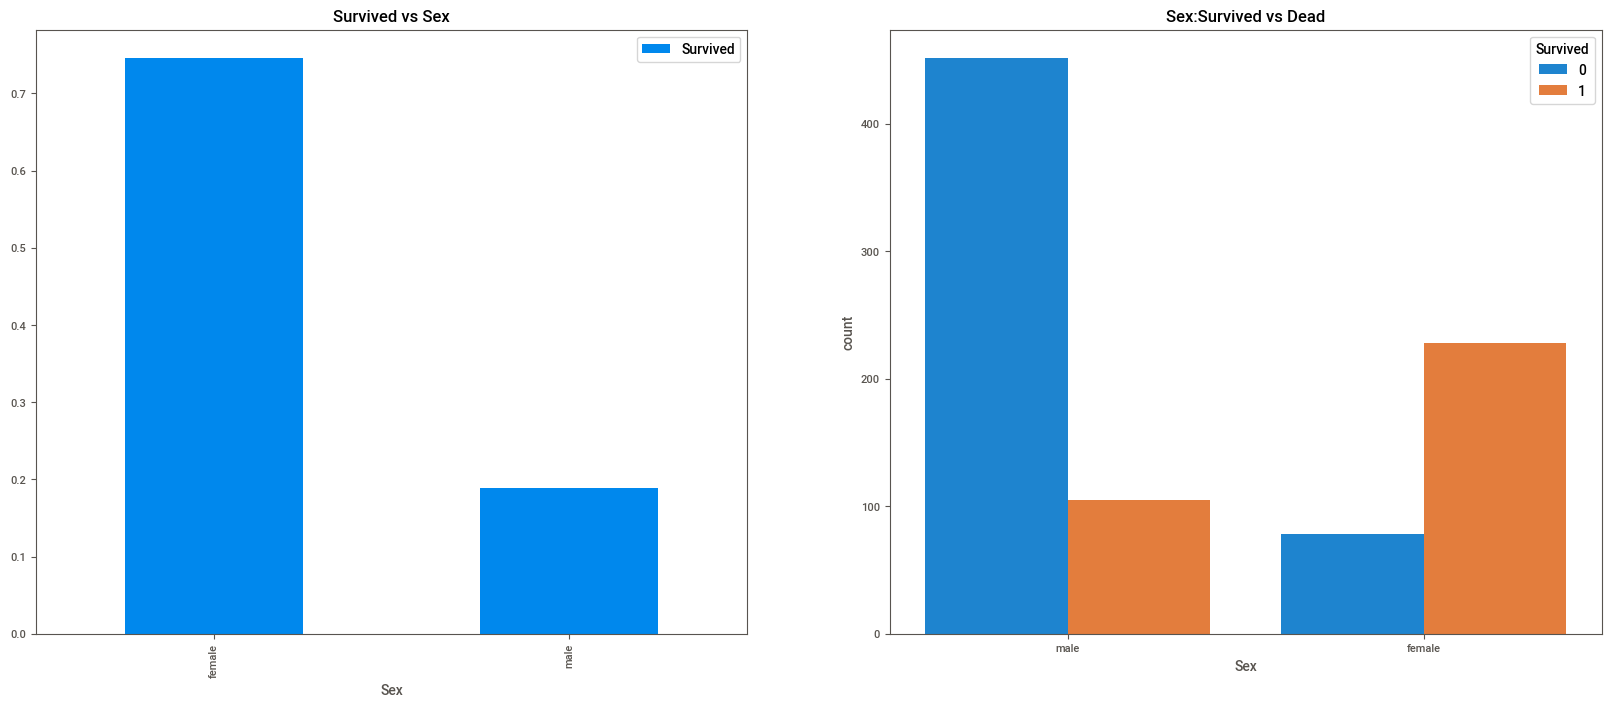

In [25]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
titanic_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = titanic_df, ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Comparing the above two graphs, it is observed that number of males is a lot higher than number of women but the umber of women survived (>70%) is more than three times the number of males survived (<20%).

### Pclass feature

In [26]:
pd.crosstab(titanic_df.Pclass, titanic_df.Survived, margins = True).style.background_gradient(cmap = 'Spectral')

Survived,0,1,All
Pclass,,,
1,78,136,214
2,97,86,183
3,361,117,478
All,536,339,875


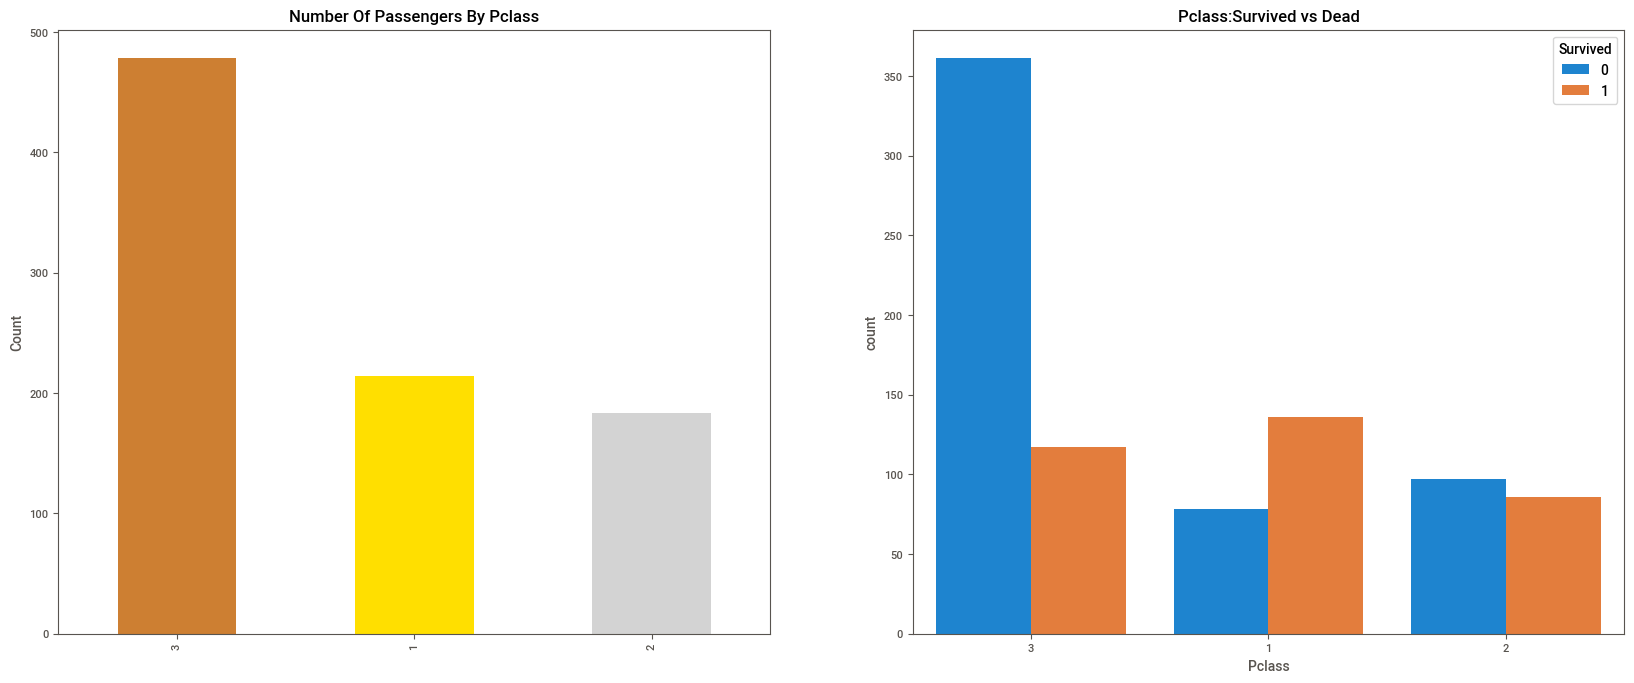

In [27]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
titanic_df['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = titanic_df, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

1-Pclass was the most expensive class in the ship and 3-Pclass was least expensive.

It is observed from the above graphs that 1-Pclass passengers have highest survival rate although the highest number of passengers were in 3-Pclass.

Inspecting Sex and Pclass features together to get further insights

In [28]:
pd.crosstab([titanic_df.Sex, titanic_df.Survived], titanic_df.Pclass, margins = True).style.background_gradient(cmap='Spectral')

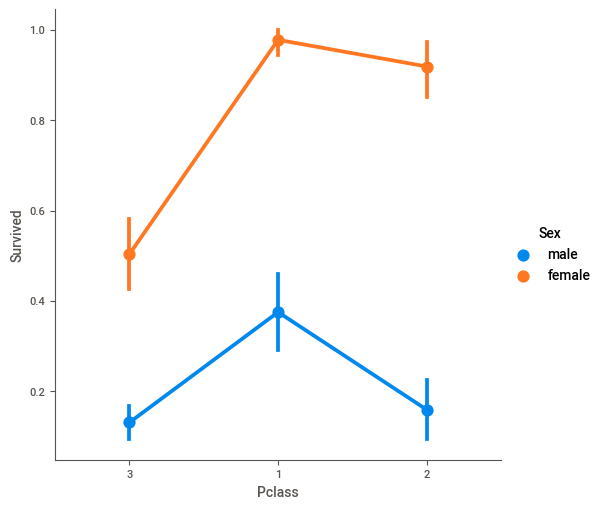

In [29]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = titanic_df)
plt.show()

Using FactorPlot funciton in this case, since they make the seperation of categorical values easy.

It is clearly inferred that survival for women from 1-Pclass is aroud 95% (3 out of 94 women died from 1-Pclass). Furthermore, it is also evident that women in general were given priority.

Whereas men in general had low survival rate. 1-Pclass had highest survival rate but men from this class had only around 38% survival rate.

### Siblings/Spouces Aboard feature

Renaming column name to remove spaces and keep short name

In [30]:
titanic_df.rename(columns = {"Siblings/Spouses Aboard": "sibs_spos_abrd"}, inplace = True)

In [31]:
pd.crosstab([titanic_df.sibs_spos_abrd], titanic_df.Survived).style.background_gradient(cmap = 'Spectral')

Survived,0,1
sibs_spos_abrd,,
0,386,207
1,97,112
2,14,13
3,12,4
4,15,3
5,5,0
8,7,0


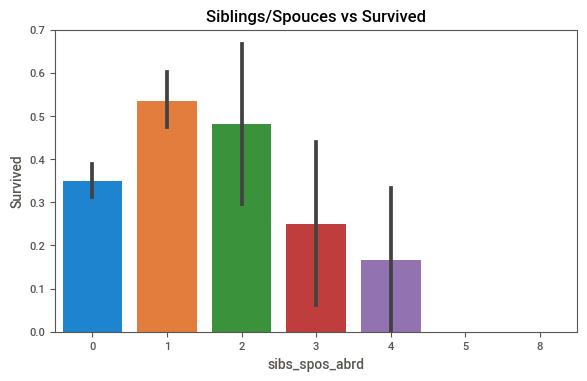

In [32]:
sns.barplot('sibs_spos_abrd','Survived', data = titanic_df).set(title = 'Siblings/Spouces vs Survived')
plt.show()

In [33]:
pd.crosstab(titanic_df.sibs_spos_abrd, titanic_df.Pclass).style.background_gradient(cmap = 'Spectral')

Pclass,1,2,3
sibs_spos_abrd,,,
0,135,119,339
1,71,55,83
2,5,8,14
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


 - The above plots shows that if a passenger is alone onboard with no siblings, he/she have 35% survival rate.

 - The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. This is further proven from the crosstab. It shows that sibs_spos_abrd of 4 or higher number died.

### Parents/Childern Aboard

Renaming column name to remove spaces and keep short name

In [34]:
titanic_df.rename(columns = {"Parents/Children Aboard": "prnt_chldn_abrd"}, inplace = True)

In [35]:
pd.crosstab(titanic_df.prnt_chldn_abrd, titanic_df.Pclass).style.background_gradient(cmap = 'Spectral')

Pclass,1,2,3
prnt_chldn_abrd,,,
0,161,133,369
1,31,32,55
2,21,16,42
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

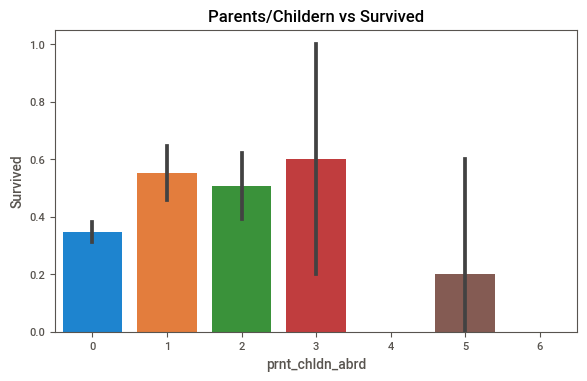

In [36]:
sns.barplot('prnt_chldn_abrd','Survived', data = titanic_df).set(title = 'Parents/Childern vs Survived')
plt.show()

 - The Parents/Childern feature also gives similar results to Siblings/Spouces. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

 - The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has > 4 parents on the ship.

### Fare feature

In [37]:
print('Average Fare was:', titanic_df['Fare'].mean())
print('Lowest Fare was:', titanic_df['Fare'].min())
print('Highest Fare was:', titanic_df['Fare'].max())

Average Fare was: 10661.054518514284
Lowest Fare was: 0.0
Highest Fare was: 800069.55


The lowest fare is **0.0**. Wow!! a free luxorious ride.

Checking anomalies in the Fare column

In [38]:
titanic_df[titanic_df['Fare'] > 513]

,Survived,Pclass,Name,Sex,Age,sibs_spos_abrd,prnt_chldn_abrd,Fare
30,0,1,Don. Manuel E Uruchurtu,male,40.0,0,0,700027.7208
53,0,1,Mr. Engelhart Cornelius Ostby,male,65.0,0,1,700061.9792
154,0,1,Mr. Charles Duane Williams,male,51.0,0,1,800061.3792
158,0,3,Master. Thomas Henry Sage,male,5.0,8,2,800069.5500
204,0,3,Miss. Telma Matilda Strom,female,2.0,0,1,700010.4625
233,0,2,Mr. Robert William Norman Leyson,male,24.0,0,0,600010.5000
279,0,3,Mr. Nils Johan Goransson Olsson,male,28.0,0,0,500007.8542
294,0,3,Mr. Mansour Hanna,male,23.5,0,0,700007.2292
372,0,3,Miss. Stina Viola Palsson,female,3.0,3,1,500021.0750
655,0,2,Mr. George Floyd Eitemiller,male,23.0,0,0,500013.0000


In [39]:
len(titanic_df[titanic_df['Fare'] > 513])

15

In [40]:
titanic_df = titanic_df.drop(titanic_df[titanic_df.Fare > 513].index)

As mentioned earlier that 800070 cost for ticket is too expensive to be real. Upon close inspection of values it was observed that there are 16 values which are higher than 600. All of these are around 700000! which is a huge gap between most expensive ticket (513$).

These are simply removed to keep simple analysis. Otherwise, they can be adjusted according to their specific class.

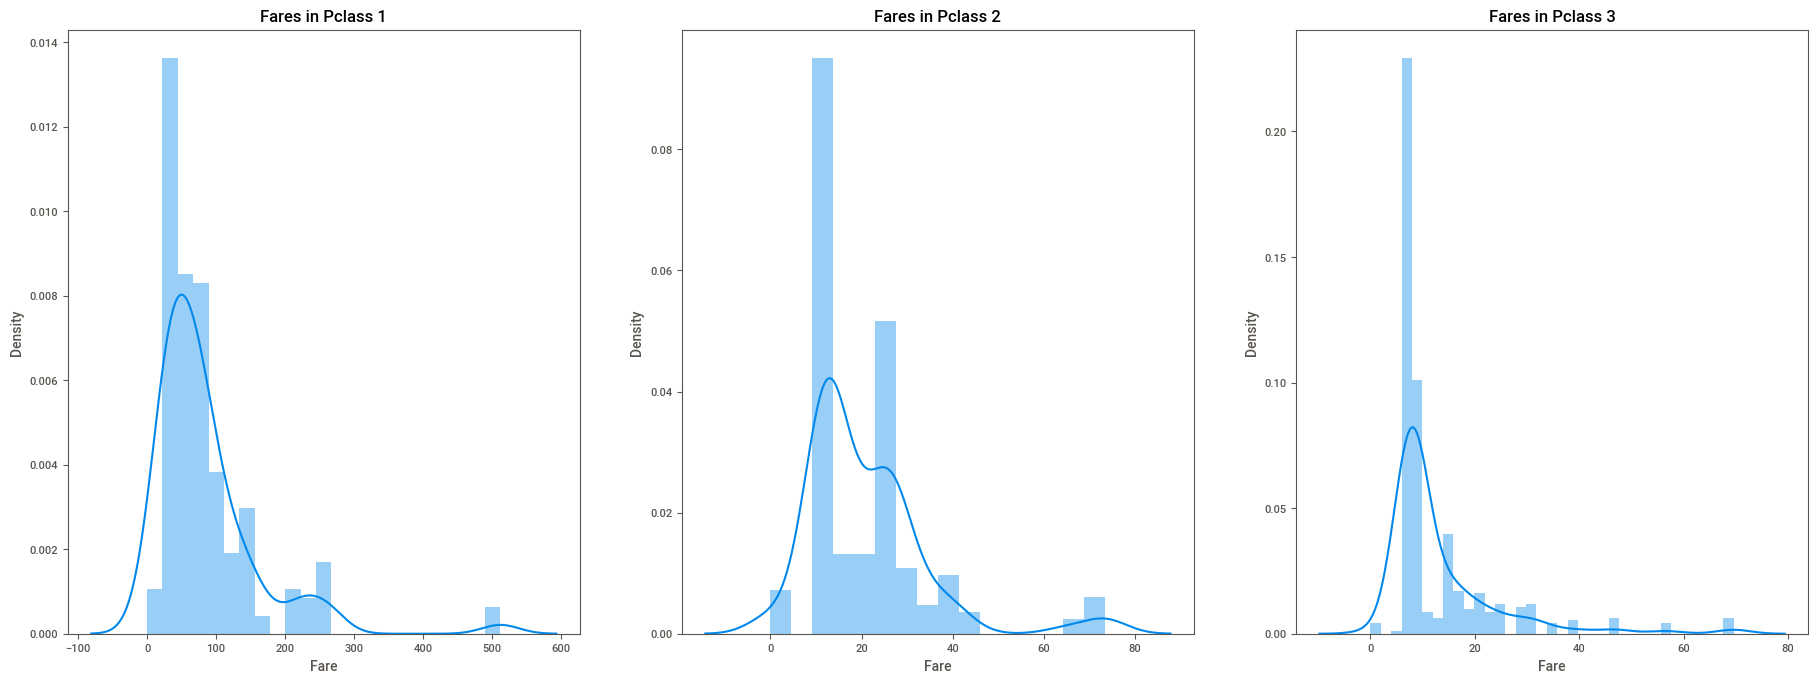

In [41]:
f, ax = plt.subplots(1, 3, figsize = (20,8))
sns.distplot(titanic_df[titanic_df['Pclass'] == '1'].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(titanic_df[titanic_df['Pclass'] == '2'].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(titanic_df[titanic_df['Pclass'] == '3'].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

 - The distribution of 1-pclass seems to be spread over a large range. It has mainly decreaing trend after highest second peak bar. Compared to other 2 plots, 1-pclass has more values around the range 40-200.
 - 2-pclass distribution have 2 high bars which satisfy the fact that it is a mid price ranged category of ticket.
 - 3-pclass is a cheapest fare ticket therefore it has main distribution in range 0-20.

## Conclusion on observations for all features:
**Sex:** The chance of survival for women is high as compared to men.

**Pclass**: There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for 3-pclass is very low. For women, the chance of survival from 1-pclass is almost all 1 and is high too for those from 2-pclass. 

**Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 16 to 40 died the most.

**Parents/Children + Siblings/Spouses:** Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

## Correlation Between The Features

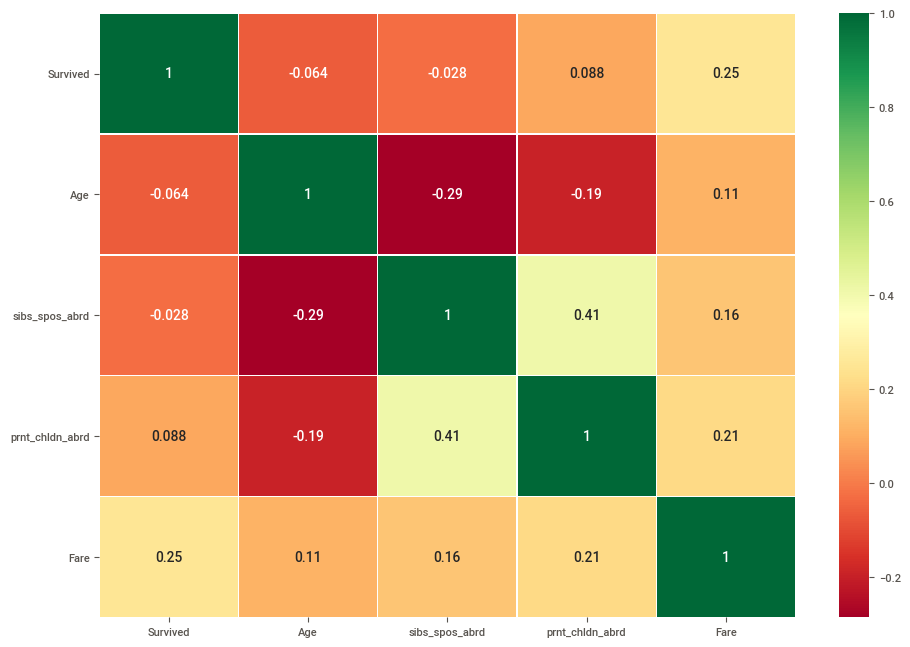

In [42]:
sns.heatmap(titanic_df.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

 - The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings.

 - If two features are highly correlated, means if one increase causes an increase in the other feature. It means that only one of them can be used for anaysis as they both contains almost the same information. It also reduces the training time for machine learning algorithms.

 - From the above heatmap, we can see that the features are not much correlated. The highest correlation is between Siblings/Spouses and Parents/Children i.e 0.41. So we can carry on with all features.

# Feature Engineering

### Age_band feature

Since Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

Eg: If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

If I group them by their Age, that would be practically inaccurate. If there are 30 Persons, there may be 30 age values means 30 different categories which is problematic.

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

From the above insights the maximum age of a passenger is 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16.
So bins of size 16.

In [43]:
titanic_df['Age_band']=0
titanic_df.loc[titanic_df['Age'] <= 16, 'Age_band'] = 0
titanic_df.loc[(titanic_df['Age'] > 16) & (titanic_df['Age'] <= 32), 'Age_band'] = 1
titanic_df.loc[(titanic_df['Age'] > 32) & (titanic_df['Age'] <= 48), 'Age_band'] = 2
titanic_df.loc[(titanic_df['Age'] > 48) & (titanic_df['Age'] <= 64), 'Age_band'] = 3
titanic_df.loc[titanic_df['Age'] > 64, 'Age_band'] = 4
titanic_df.head(2)

,Survived,Pclass,Name,Sex,Age,sibs_spos_abrd,prnt_chldn_abrd,Fare,Age_band
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,2


Checking the number of passenegers in each band

In [44]:
titanic_df['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'Spectral')

,Age_band
1,438
2,226
0,109
3,75
4,12


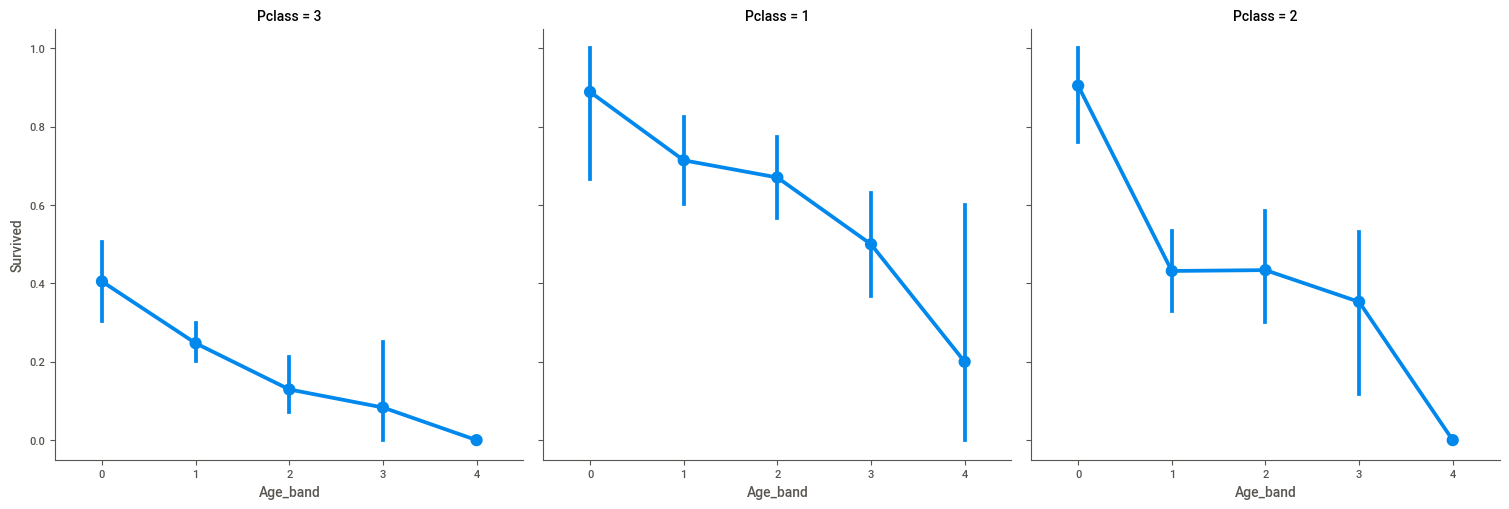

In [45]:
sns.factorplot('Age_band', 'Survived', data = titanic_df, col = 'Pclass')
plt.show()

Fact from above plots: the survival rate decreases as the age increases irrespective of the Pclass.

### Family_size and Alone features

At this point, a new feature can be created called "family_size" and "alone". This feature is the summation of Parents/Children and Siblings/Spouses. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will tell whether a passenger is alone or not.

In [46]:
titanic_df['Family_Size'] = 0
titanic_df['Family_Size'] = titanic_df['prnt_chldn_abrd'] + titanic_df['sibs_spos_abrd'] #adding family_size feature
titanic_df['Alone'] = 0
titanic_df.loc[titanic_df.Family_Size == 0, 'Alone'] = 1 #adding alone feature

In [47]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,sibs_spos_abrd,prnt_chldn_abrd,Fare,Age_band,Family_Size,Alone
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,1,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,2,1,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,NaN,35.0,1,0,53.1000,2,1,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,2,0,1


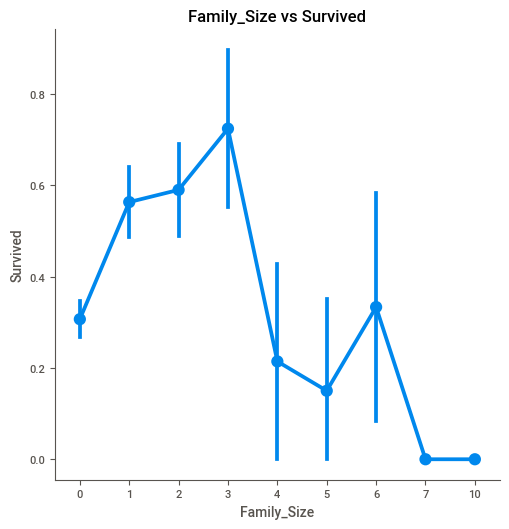

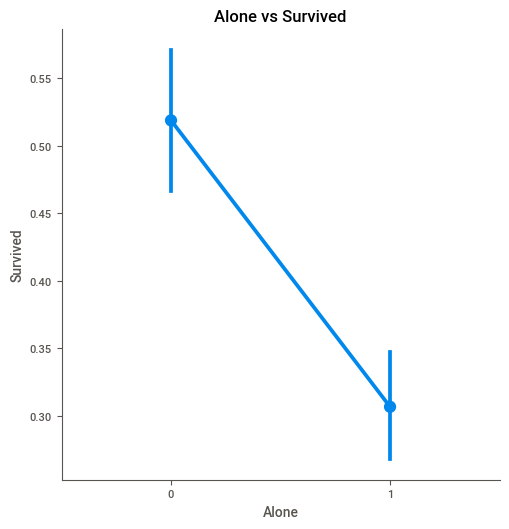

In [48]:
sns.factorplot('Family_Size','Survived', data = titanic_df).set(title = 'Family_Size vs Survived')
sns.factorplot('Alone','Survived', data = titanic_df).set(title = 'Alone vs Survived')
plt.show()

Family_Size = 0 means that the passeneger is alone. Clearly, if you are alone or family_size = 0,then chances for survival is very low. For family size > 4, the chances decrease too from above insights. This also looks to be an important feature for the model. Lets examine this further.

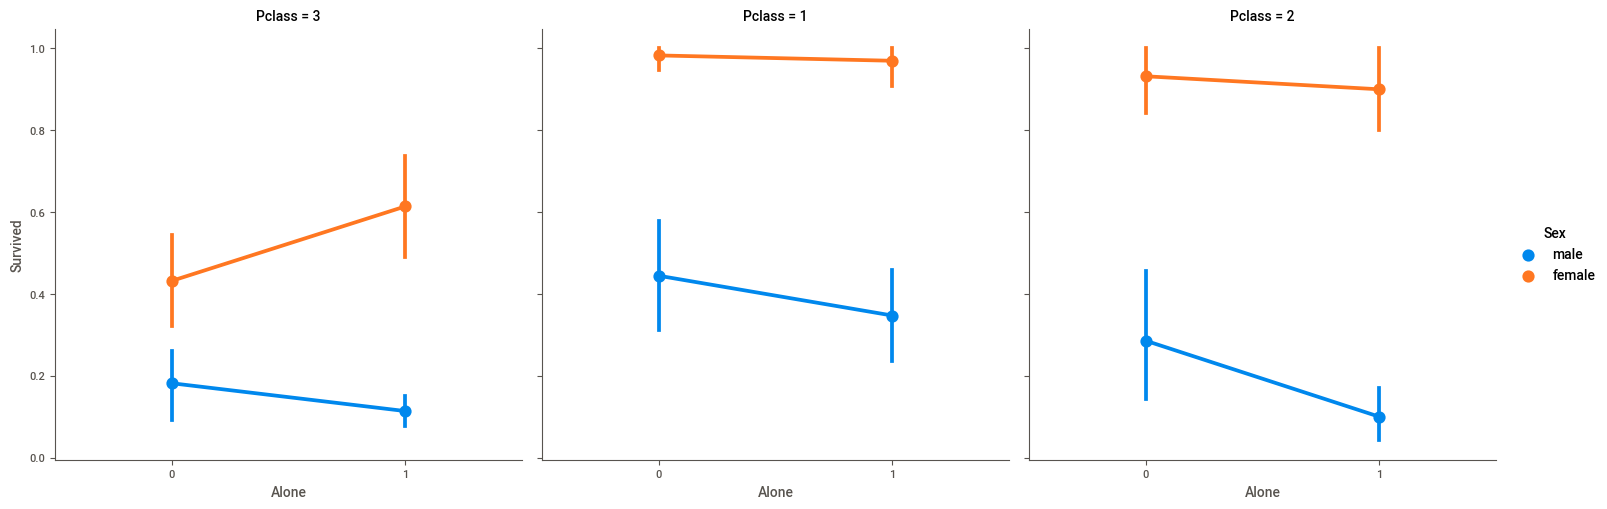

In [49]:
sns.factorplot('Alone', 'Survived', data = titanic_df, hue = 'Sex', col = 'Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

### Fare_Range feature

Since fare is also a continous feature, we need to convert it into ordinal value.

Using qcut fucntion of Pnadas library. It splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges. It saves a lot of time doing manual binning.

In [50]:
titanic_df['Fare_Range'] = pd.qcut(titanic_df['Fare'],4)
titanic_df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'Spectral')

,Survived
Fare_Range,
"(-0.001, 7.925]",0.222707
"(7.925, 14.456]",0.293532
"(14.456, 31.069]",0.469767
"(31.069, 512.329]",0.586047


As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.

We cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [51]:
titanic_df['Fare_cat'] = 0
titanic_df.loc[titanic_df['Fare'] <= 7.91,'Fare_cat'] = 0
titanic_df.loc[(titanic_df['Fare'] > 7.91) & (titanic_df['Fare'] <= 14.454), 'Fare_cat'] = 1
titanic_df.loc[(titanic_df['Fare'] > 14.454) & (titanic_df['Fare'] <= 31), 'Fare_cat'] = 2
titanic_df.loc[(titanic_df['Fare'] > 31) & (titanic_df['Fare'] <= 513), 'Fare_cat'] = 3

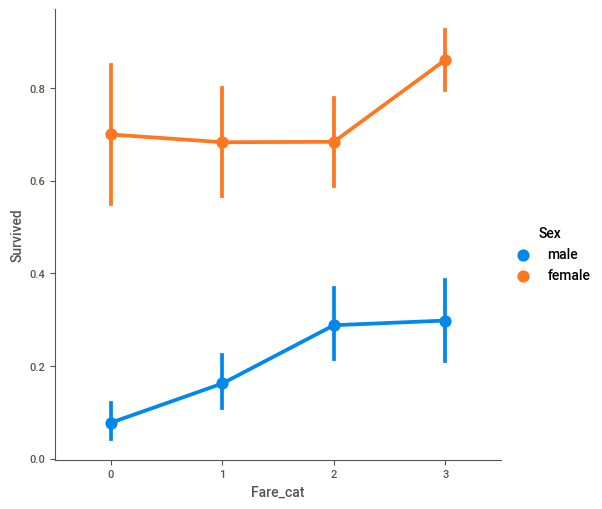

In [52]:
sns.factorplot('Fare_cat', 'Survived', data = titanic_df, hue = 'Sex')
plt.show()

Just like Fare_Range, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Converting String Values into Numeric

Since we cannot pass strings to a machine learning models, we need to convert features such as Sex into numeric values.

In [53]:
titanic_df.isna().sum()

Survived            0
Pclass              0
Name                0
Sex                12
Age                 0
sibs_spos_abrd      0
prnt_chldn_abrd     0
Fare                0
Age_band            0
Family_Size         0
Alone               0
Fare_Range          0
Fare_cat            0
dtype: int64

Since there are 12 empty cells in Sex column. They are simply removed.

In [54]:
titanic_df['Sex'].replace(['male','female'], [0,1], inplace = True)

In [55]:
titanic_df.dropna(subset = ["Sex"], inplace = True)

In [56]:
titanic_df

,Survived,Pclass,Name,Sex,Age,sibs_spos_abrd,prnt_chldn_abrd,Fare,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,0,3,Mr. Owen Harris Braund,0.0,22.0,1,0,7.2500,1,1,0,"(-0.001, 7.925]",0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1.0,38.0,1,0,71.2833,2,1,0,"(31.069, 512.329]",3
2,1,3,Miss. Laina Heikkinen,1.0,26.0,0,0,7.9250,1,0,1,"(-0.001, 7.925]",1
4,0,3,Mr. William Henry Allen,0.0,35.0,0,0,8.0500,2,0,1,"(7.925, 14.456]",1
5,0,3,Mr. James Moran,0.0,27.0,0,0,8.4583,1,0,1,"(7.925, 14.456]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,0.0,27.0,0,0,13.0000,1,0,1,"(7.925, 14.456]",1
883,1,1,Miss. Margaret Edith Graham,1.0,19.0,0,0,30.0000,1,0,1,"(14.456, 31.069]",2
884,0,3,Miss. Catherine Helen Johnston,1.0,7.0,1,2,23.4500,0,3,0,"(14.456, 31.069]",2
885,1,1,Mr. Karl Howell Behr,0.0,26.0,0,0,30.0000,1,0,1,"(14.456, 31.069]",2


### Dropping unnecessary features

 - Name: We don't need name feature as it cannot be converted into any categorical value.

 - Age: We have the Age_band feature, so no need of this.

 - Ticket: It is any random string that cannot be categorised.

 - Fare: We have the Fare_cat feature, so its not needed

 - Cabin: A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

 - Fare_Range: We have the fare_cat feature.

 - PassengerId: Cannot be categorised and has no relation to other features.

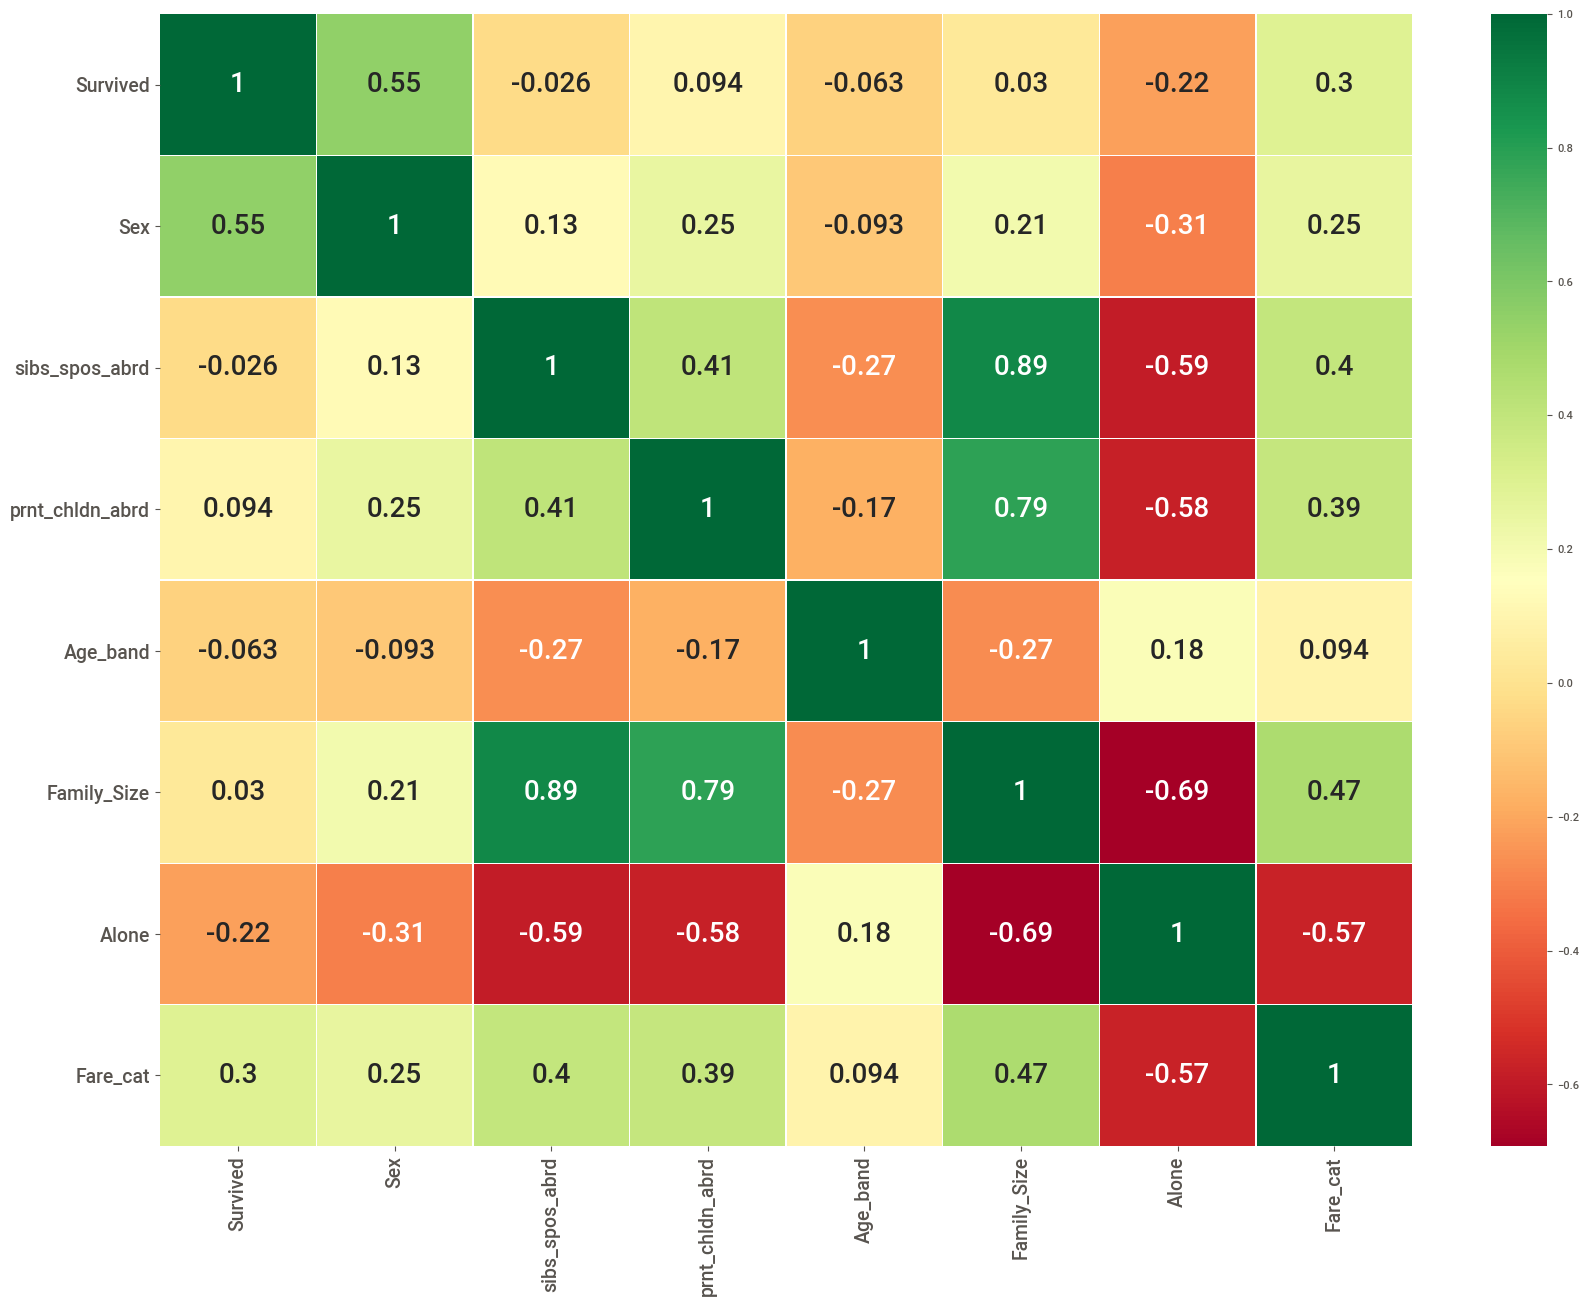

In [57]:
titanic_df.drop(['Name', 'Age', 'Fare', 'Fare_Range'], axis = 1, inplace = True)
sns.heatmap(titanic_df.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [58]:
titanic_df

,Survived,Pclass,Sex,sibs_spos_abrd,prnt_chldn_abrd,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0.0,1,0,1,1,0,0
1,1,1,1.0,1,0,2,1,0,3
2,1,3,1.0,0,0,1,0,1,1
4,0,3,0.0,0,0,2,0,1,1
5,0,3,0.0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
882,0,2,0.0,0,0,1,0,1,1
883,1,1,1.0,0,0,1,0,1,2
884,0,3,1.0,1,2,0,3,0,2
885,1,1,0.0,0,0,1,0,1,2


From the above correlation plot, we can see some positively related features. Such as sibs_spos_abrd and Family_Size and prnt_chldn_abrd and Family_Size and some negative ones like Alone and Family_Size.

# Machine Learning

We have gained some valuable insights from the EDA and feature engineering part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms. Following are the algorithms I will use to make the model:

1) Logistic Regression

2) Support Vector Machines(Linear and radial)

3) Random Forest

4) K-Nearest Neighbours

5) Naive Bayes

6) Decision Tree

7) Logistic Regression

Importing all the machine learning libraries

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Splitting data into train and test datasets. 70% of data is train and 30% of data is test

In [60]:
train, test = train_test_split(titanic_df, test_size = 0.3, random_state = 0, stratify = titanic_df['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = titanic_df[titanic_df.columns[1:]]
Y = titanic_df['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [61]:
model_r_svm = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model_r_svm.fit(train_X, train_Y)
prediction_r_svm = model_r_svm.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction_r_svm, test_Y))

Accuracy for rbf SVM is  0.792156862745098


### Linear Support Vector Machine(linear-SVM)

In [62]:
model_svm = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model_svm.fit(train_X,train_Y)
prediction_svm = model_svm.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction_svm, test_Y))

Accuracy for linear SVM is 0.7568627450980392


### Logistic Regression

In [63]:
model_lr = LogisticRegression()
model_lr.fit(train_X,train_Y)
prediction_lr = model_lr.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction_lr, test_Y))

The accuracy of the Logistic Regression is 0.7529411764705882


### Decision Tree

In [66]:
model_dt=DecisionTreeClassifier()
model_dt.fit(train_X,train_Y)
prediction_dt = model_dt.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction_dt, test_Y))

The accuracy of the Decision Tree is 0.792156862745098


### K-Nearest Neighbours(KNN)

In [67]:
model_knn = KNeighborsClassifier() 
model_knn.fit(train_X, train_Y)
prediction_knn = model_knn.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction_knn, test_Y))

The accuracy of the KNN is 0.7764705882352941


Now the accuracy for the KNN model changes as we change the values for **n_neighbours** attribute. The default value is **5**. Lets check the accuracies over various values of n_neighbours.

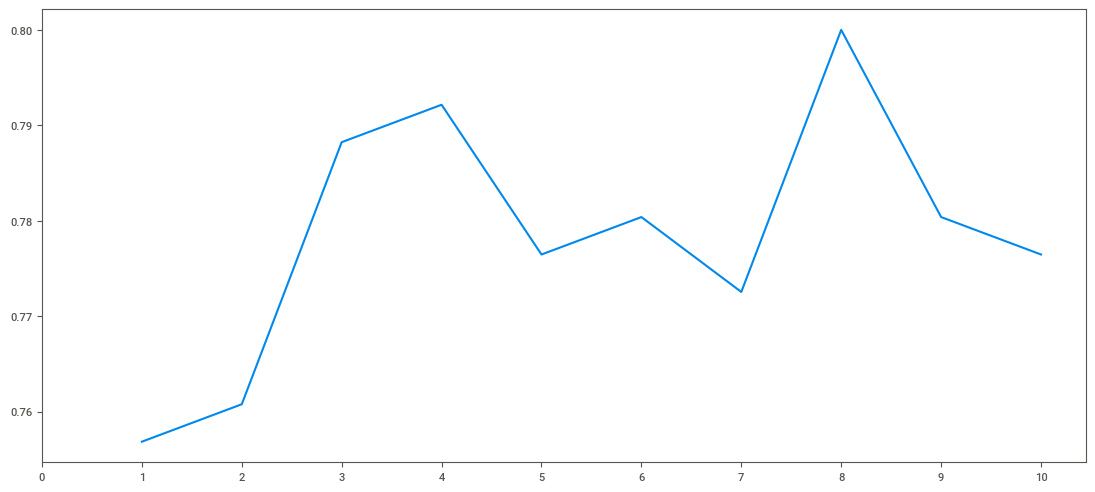

Accuracies for different values of n are: [0.75686275 0.76078431 0.78823529 0.79215686 0.77647059 0.78039216
 0.77254902 0.8        0.78039216 0.77647059] with the max value as  0.8


In [68]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = i) 
    model.fit(train_X,train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

### Gaussian Naive Bayes

In [69]:
model_gnb = GaussianNB()
model_gnb.fit(train_X,train_Y)
prediction_gnb = model_gnb.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction_gnb,test_Y))

The accuracy of the NaiveBayes is 0.7411764705882353


### Random Forests

In [71]:
model_rf=RandomForestClassifier(n_estimators = 100)
model_rf.fit(train_X,train_Y)
prediction_rf = model_rf.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction_rf, test_Y))

The accuracy of the Random Forests is 0.803921568627451


## Cross Validation

To check how good a model is generalized. We need to do cross-validation. Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset. 

An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits = 10, random_state = 22, shuffle = True) # k=10, split the data into 10 equal parts
model_mean = []
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors = 9), 
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators = 100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    model_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_df = pd.DataFrame({'CV Mean':model_mean, 'Std':std}, index = classifiers)       
new_models_df

,CV Mean,Std
Linear Svm,0.790084,0.046472
Radial Svm,0.823095,0.040844
Logistic Regression,0.801905,0.041301
KNN,0.803011,0.042054
Decision Tree,0.812479,0.045524
Naive Bayes,0.775980,0.033977
Random Forest,0.816064,0.034498


<AxesSubplot:>

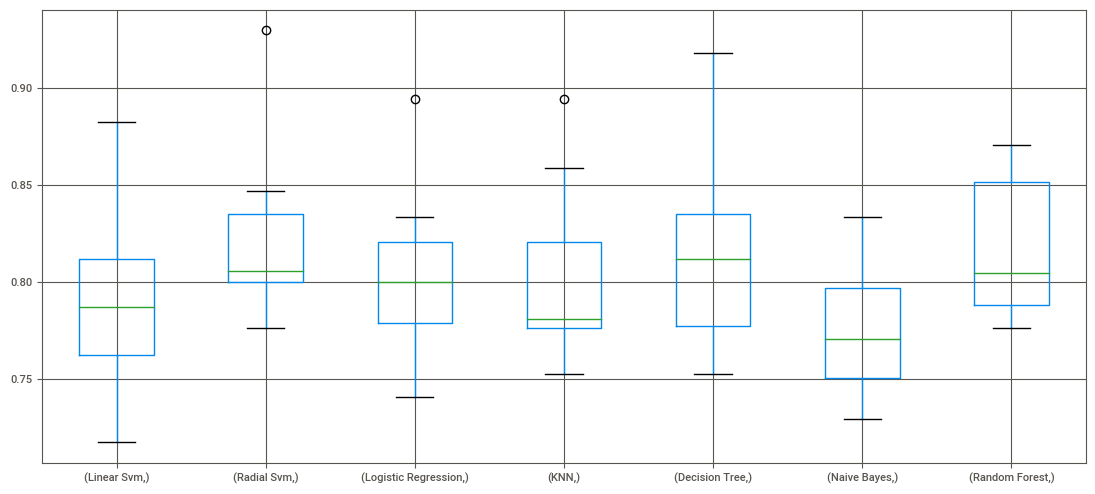

In [74]:
plt.subplots(figsize = (12,6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

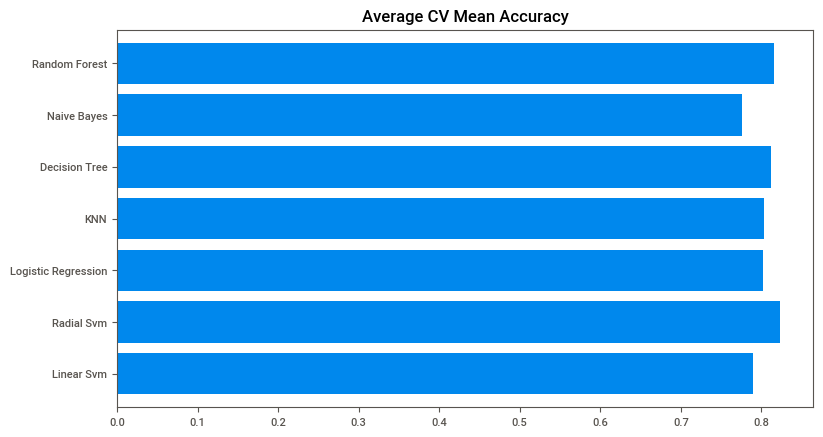

In [75]:
new_models_df['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

Evaluating the performance of model by just looking at its classification accuracy gives little information and can be misleading. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

It gives the number of correct and incorrect classifications made by the classifier.

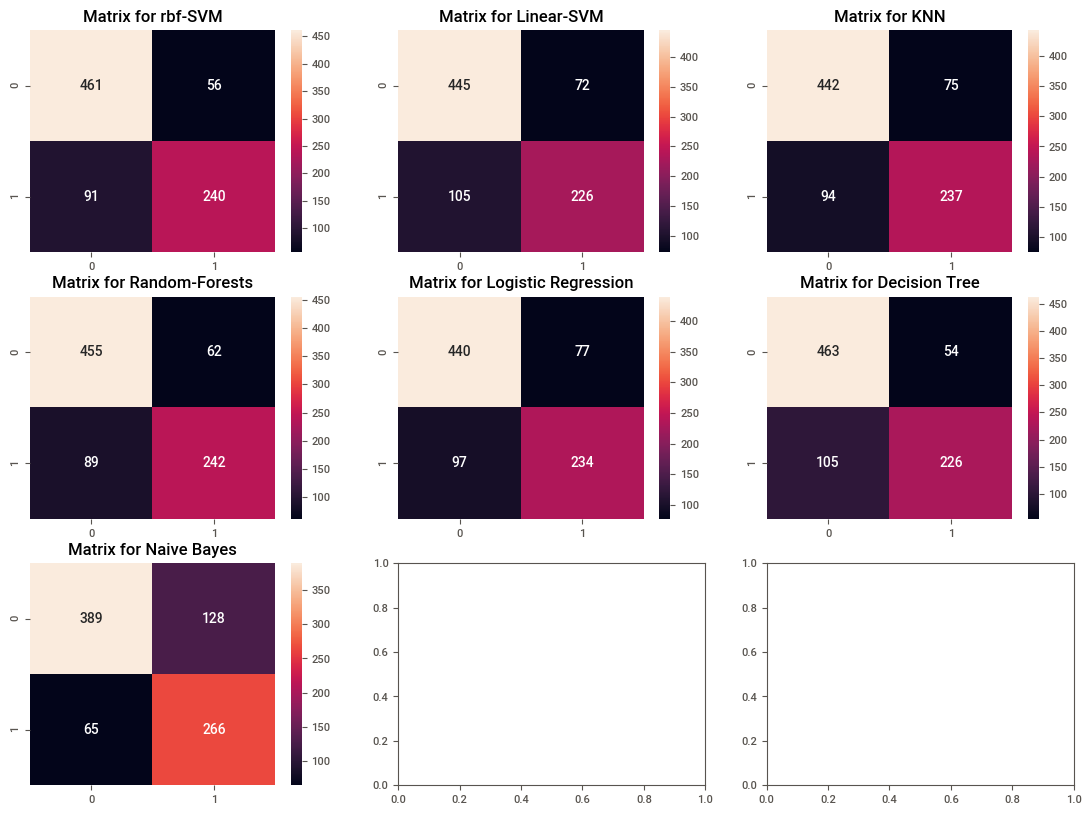

In [76]:
f, ax = plt.subplots(3, 3, figsize = (12,10))
y_pred = cross_val_predict(svm.SVC(kernel = 'rbf'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0,0], annot = True, fmt = '2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel = 'linear'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0,1], annot = True, fmt = '2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors = 9), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y,y_pred), ax = ax[0,2], annot = True, fmt = '2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators = 100), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y,y_pred), ax = ax[1,0], annot = True, fmt = '2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y,y_pred), ax = ax[1,1], annot = True, fmt = '2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y,y_pred),ax = ax[1,2], annot = True, fmt = '2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y,y_pred), ax = ax[2,0], annot = True, fmt = '2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
plt.show()

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made.

For rbf-SVM: The number of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier. Errors wrongly classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.